In [3]:
from scipy.stats import norm
import seaborn as sns
import pandas as pd 
import pylab as plt
import numpy as np
import copy
import plot_functions as plotf
import bootstrap_functions as bootf
import model_functions as modelf
import read_experimental_data as e_data

cmap = plt.cm.YlGnBu
np.random.seed(0)
%matplotlib inline

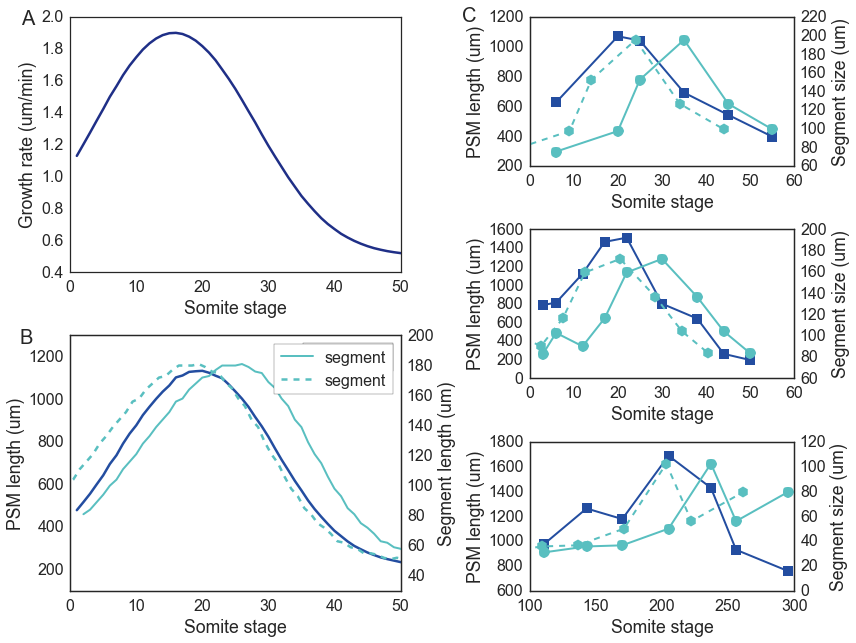

In [4]:
p = {}
p['a']  = 160.
p['b']  = 1200.
p['T0'] = 100.
p['theta'] = 1.
p['gamma'] = 30.

d = e_data.readData_Gomez2008()
d['dt'] = 1
d['t']  = np.arange(0, 8000, d['dt'])

g_param=[[4.0, 7.0], [0.5, 1.4]]
norm_dist = norm.pdf(d['t'], loc=np.max(d['t'])/g_param[0][0], scale=np.max(d['t'])/g_param[0][1])
d['g'] = g_param[1][0] + g_param[1][1]*norm_dist/np.max(norm_dist)

d['L_ef'] = np.zeros(len(d['t']))
for i in range(1, len(d['t'])):
    d['L_ef'][i] = d['L_ef'][i-1] + d['g'][i]*d['dt']
d['L_ef'] = d['L_ef'].astype(int)

plotf.modelfit_dynamicGrowth(d, p, g_param=g_param)#, save_fig='../figures/GrowthSegmentPSM_dynamicGrowth.pdf')